In [1]:
import numpy as np
np.seterr(all='ignore')
from networks import simple_network
from utils import *
simple_hyperparameters = {'N_train' : 1000, #size of training dataset 
                          'N_test' : 100, #size of test set x
                          'lr' : 0.001, #SGD learning rate 
                          'epochs' : 10, #training epochs
                          'batch_size' : 10,  #batch size (large will probably fail)           
                          'context_location' : 'start',  #where the feed in the task context 'start' vs 'end'
                          'train_mode' : 'random', #training mode 'random' vs 'replay' 
                          'second_task' : 'prod', #first task adds x+y, second task 'prod' = xy or 'add1.5' = x+1.5y
                          'fraction' : 0.50, #fraction of training data for tasks 1 vs task 2
                          'hidden_size' : 50, #hidden layer width
                          'rule1_grad' : 0,
                          'rule2_grad' : 9999}

simple_model = simple_network(simple_hyperparameters)

/nfs/nhome/live/lhollingsworth/miniconda3/envs/ModNet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


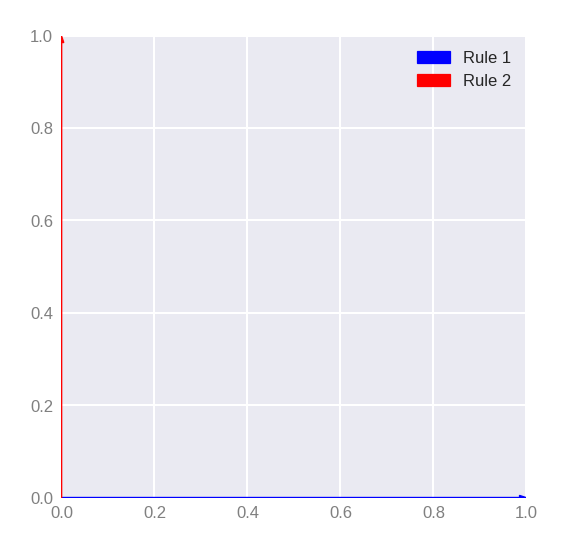

In [2]:
rule1, rule2 = simple_model.rules()
plot_rulespace(list(rule1[0]), list(rule2[0]))

Model: 100%|██████████| 100/100 [04:12<00:00,  2.53s/it]


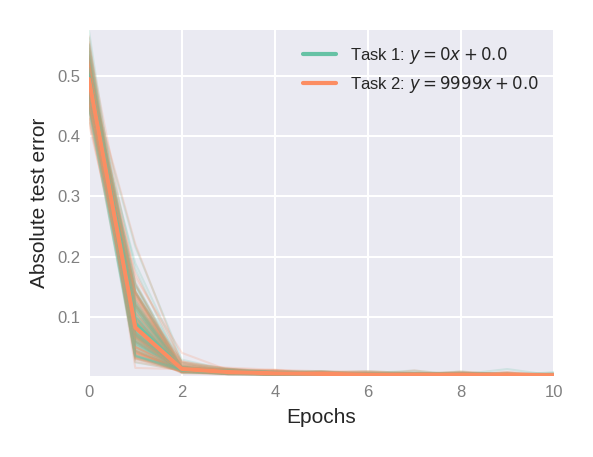

In [3]:
N_models = 100
models1 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_training(models1)

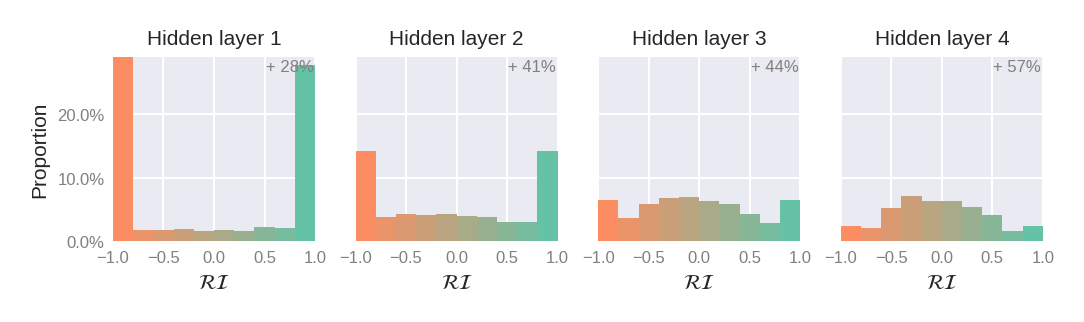

In [4]:
plot_RI(models1)

Gradient of r2 =  1000.0


Model: 100%|██████████| 20/20 [00:49<00:00,  2.46s/it]


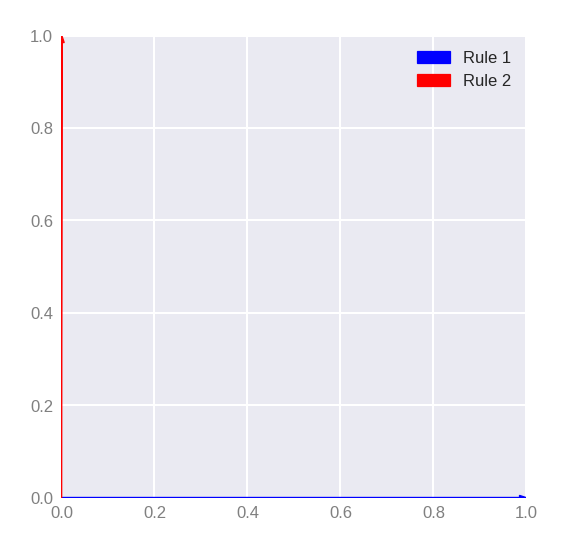

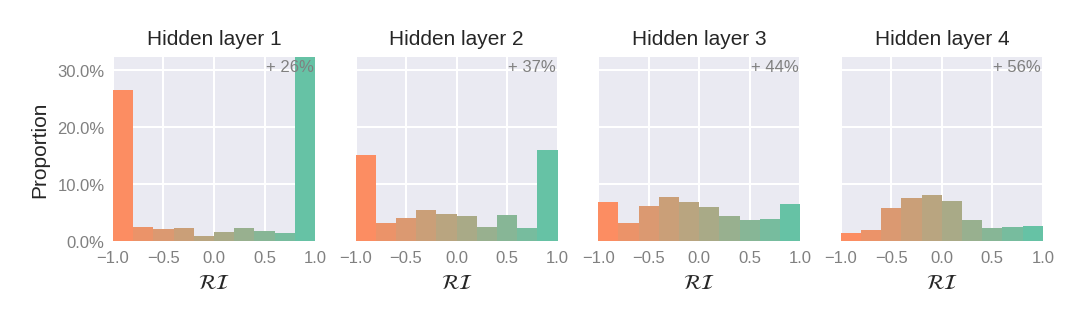

Gradient of r2 =  5.0


Model: 100%|██████████| 20/20 [00:49<00:00,  2.46s/it]


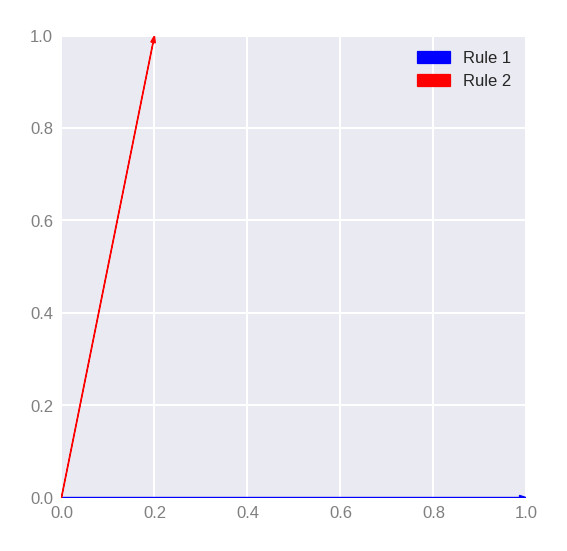

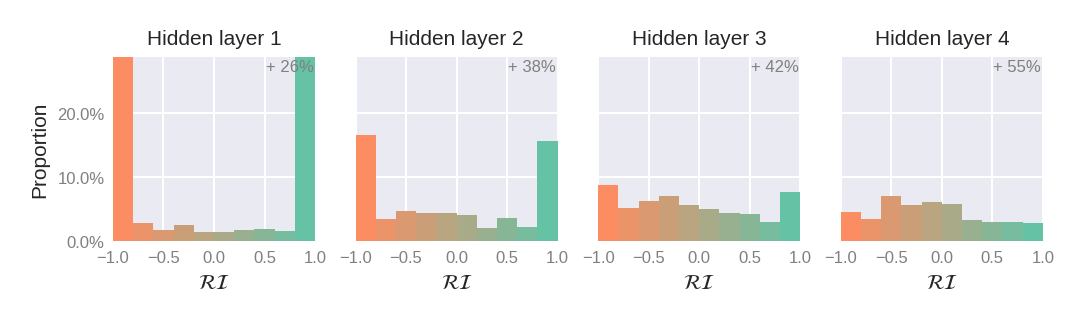

Gradient of r2 =  3.333333333333333


Model: 100%|██████████| 20/20 [00:50<00:00,  2.51s/it]


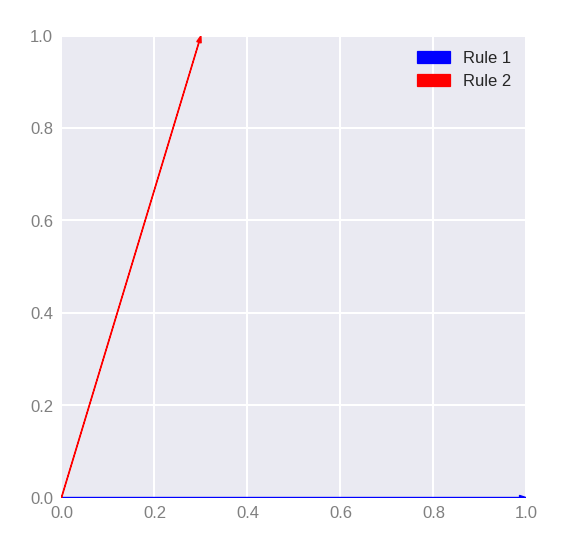

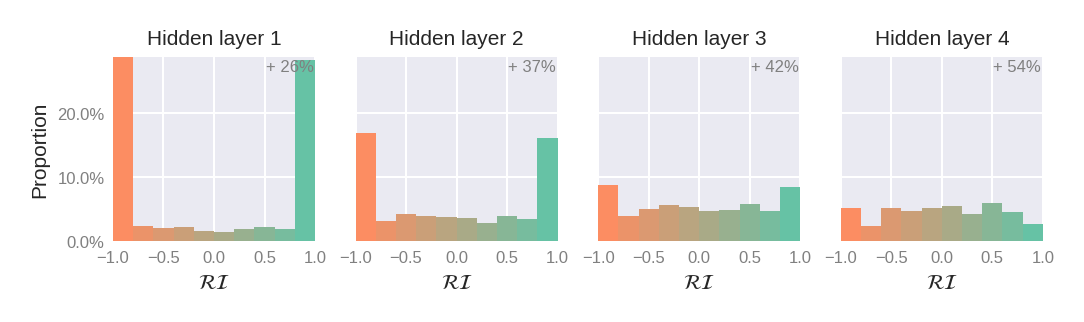

Gradient of r2 =  2.5


Model: 100%|██████████| 20/20 [00:50<00:00,  2.52s/it]


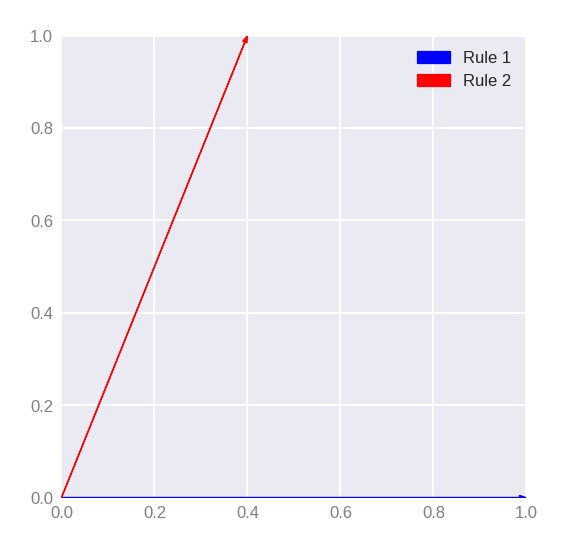

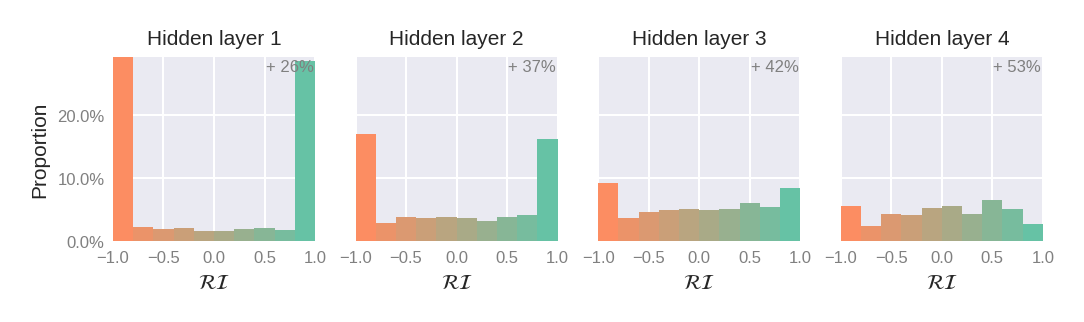

Gradient of r2 =  2.0


Model: 100%|██████████| 20/20 [00:55<00:00,  2.80s/it]


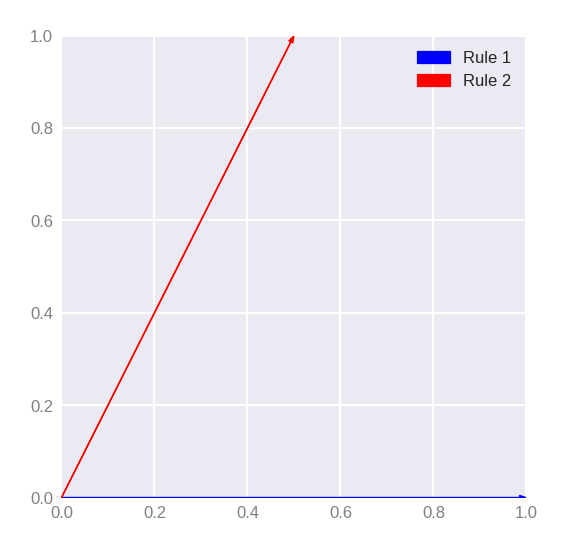

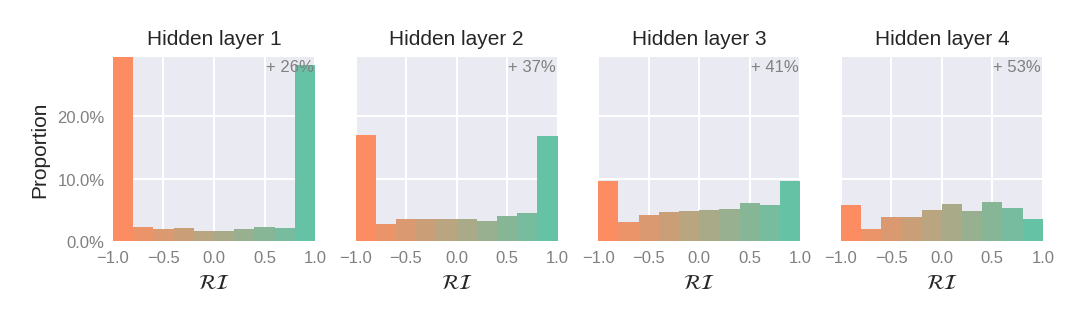

Gradient of r2 =  1.6666666666666665


Model: 100%|██████████| 20/20 [00:49<00:00,  2.50s/it]


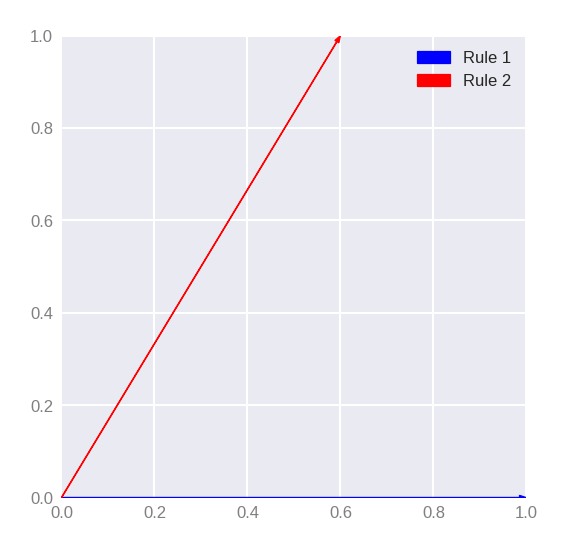

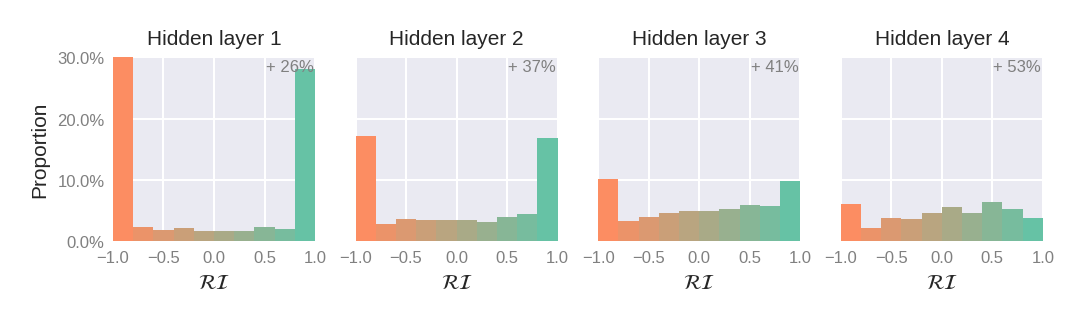

Gradient of r2 =  1.4285714285714286


Model: 100%|██████████| 20/20 [00:43<00:00,  2.17s/it]


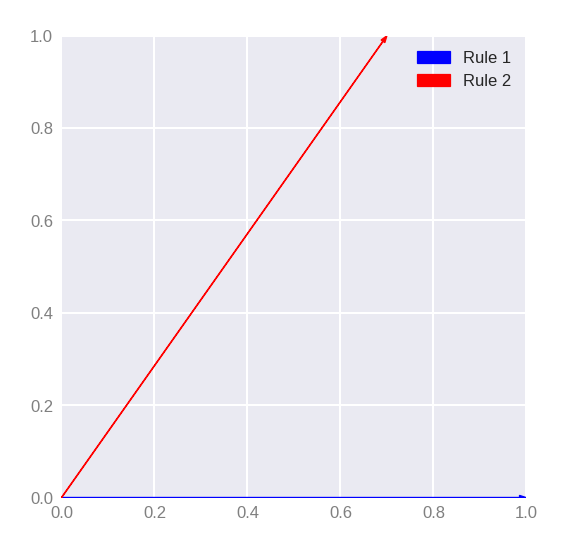

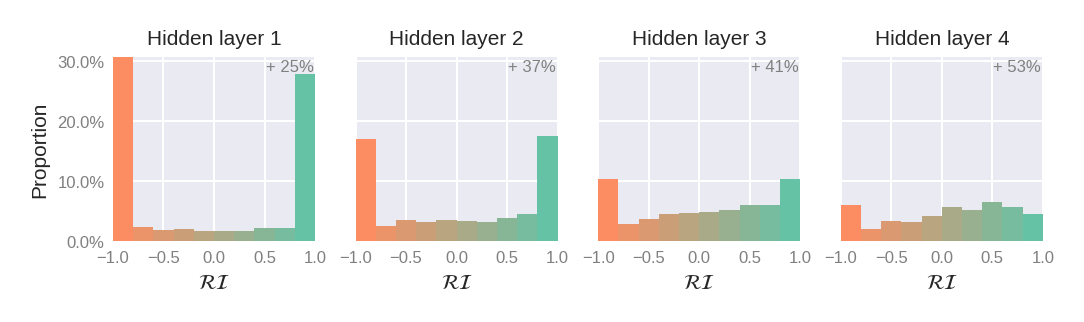

Gradient of r2 =  1.25


Model: 100%|██████████| 20/20 [00:48<00:00,  2.45s/it]


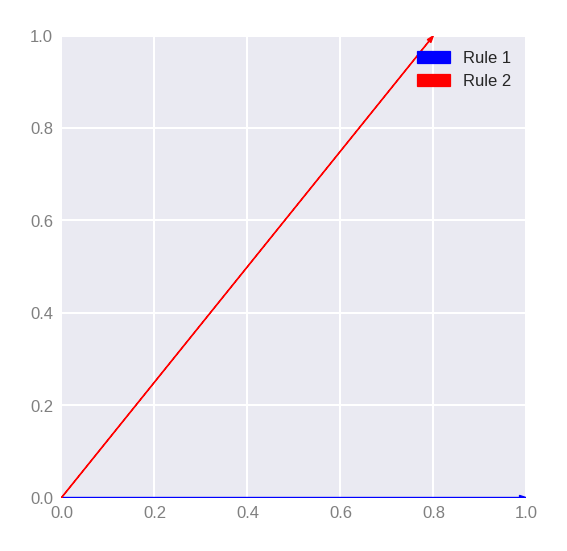

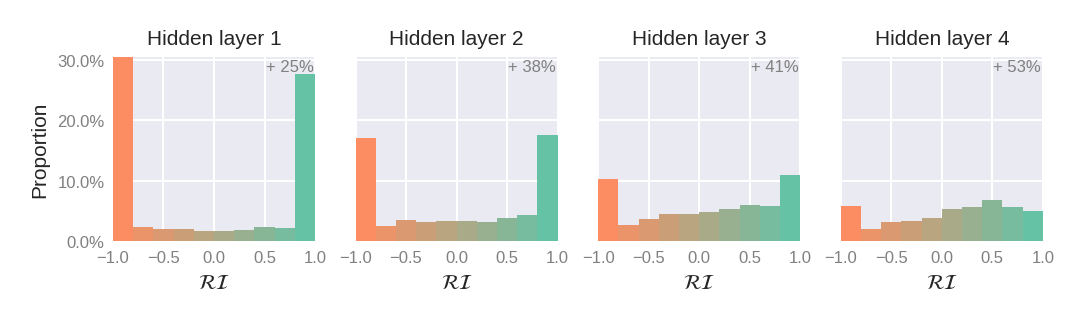

Gradient of r2 =  1.111111111111111


Model: 100%|██████████| 20/20 [00:45<00:00,  2.28s/it]


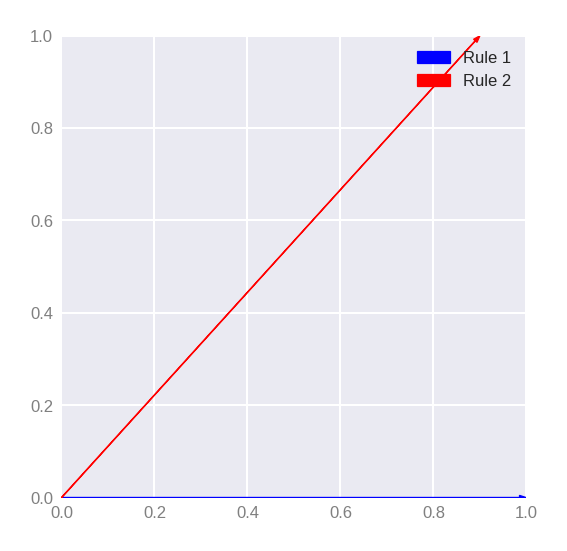

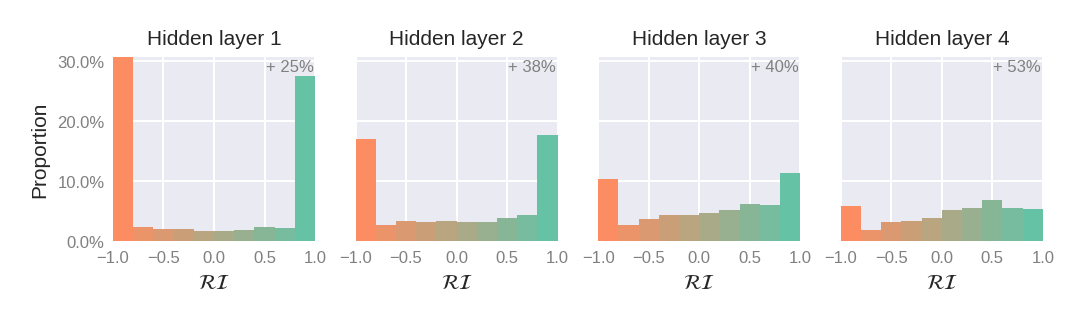

Gradient of r2 =  1.0


Model: 100%|██████████| 20/20 [00:44<00:00,  2.24s/it]


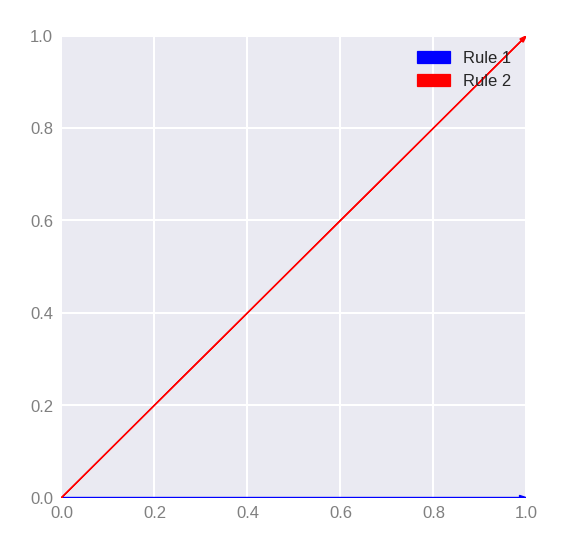

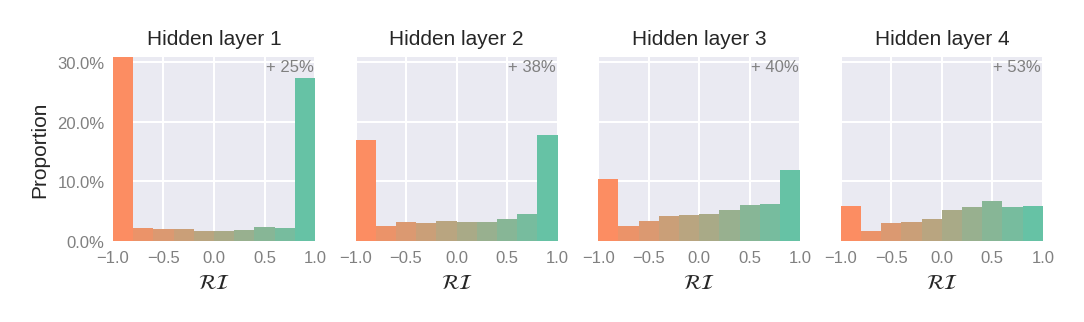

Gradient of r2 =  0.9000000000000001


Model: 100%|██████████| 20/20 [00:55<00:00,  2.78s/it]


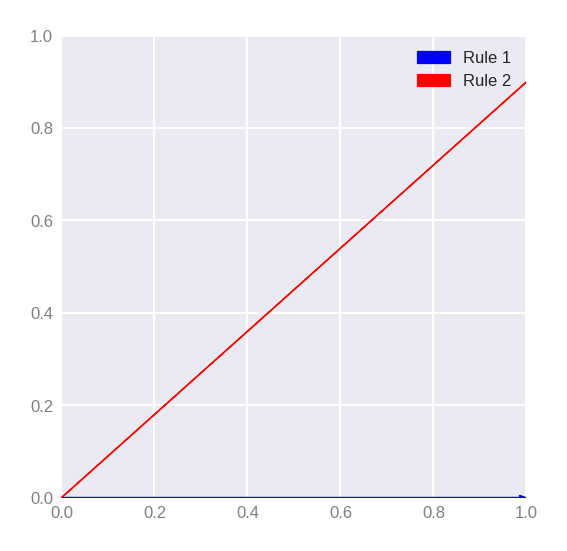

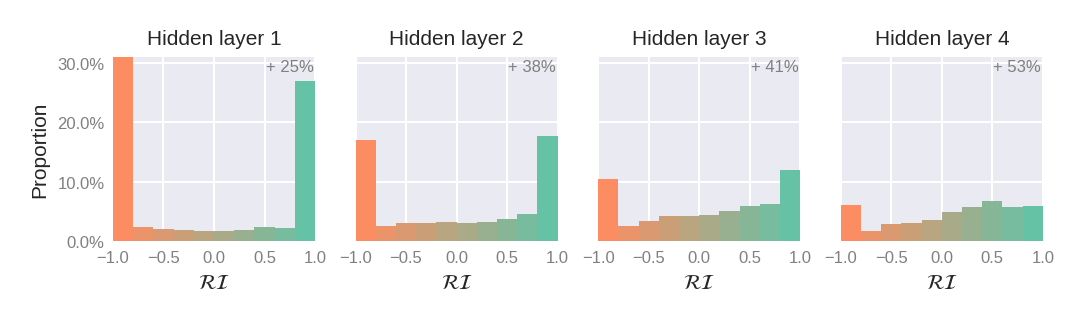

Gradient of r2 =  0.8


Model: 100%|██████████| 20/20 [00:49<00:00,  2.45s/it]


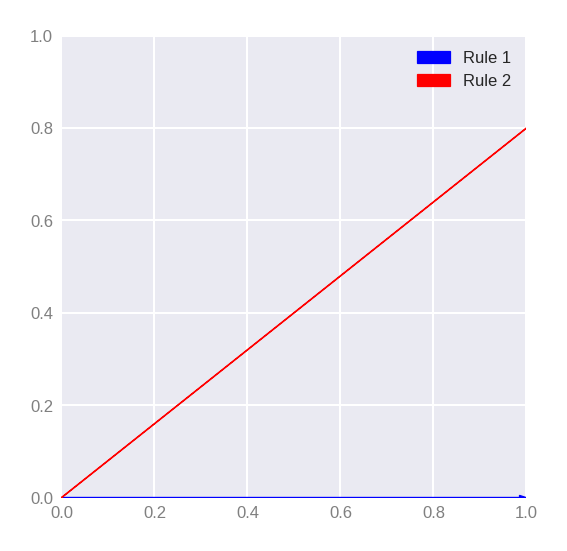

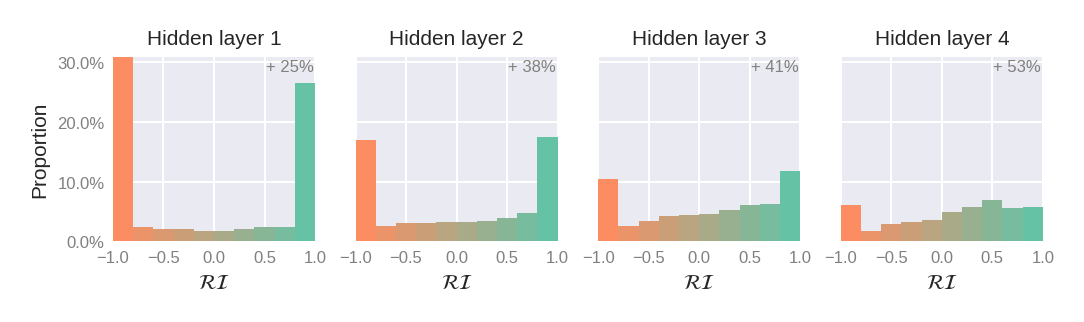

Gradient of r2 =  0.7


Model: 100%|██████████| 20/20 [00:43<00:00,  2.16s/it]


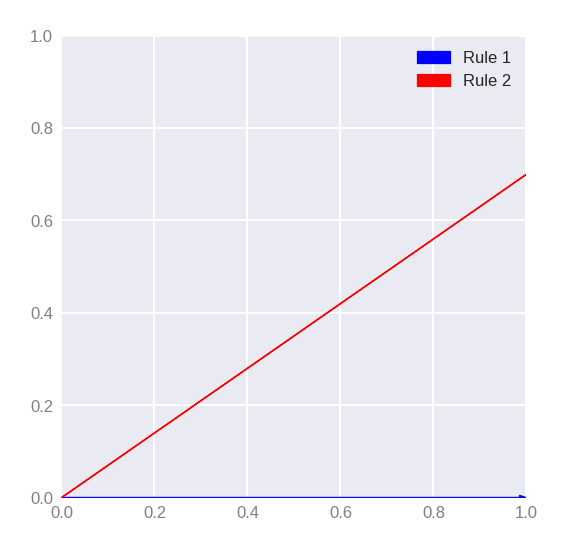

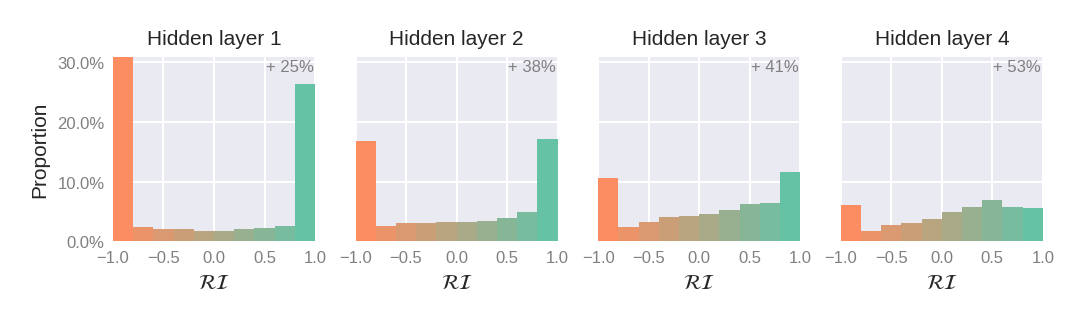

Gradient of r2 =  0.6000000000000001


Model: 100%|██████████| 20/20 [00:56<00:00,  2.84s/it]


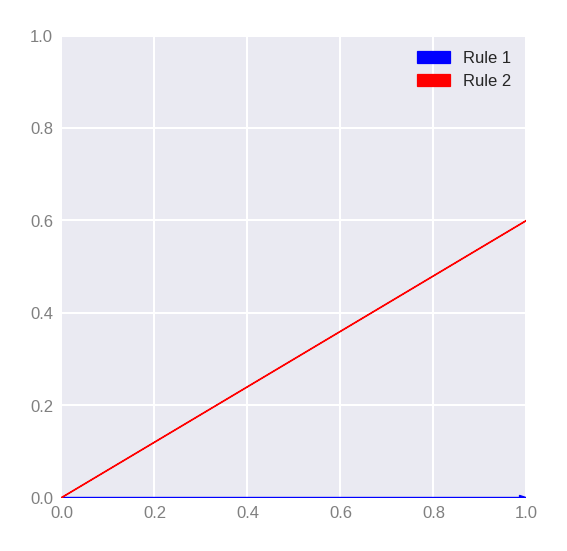

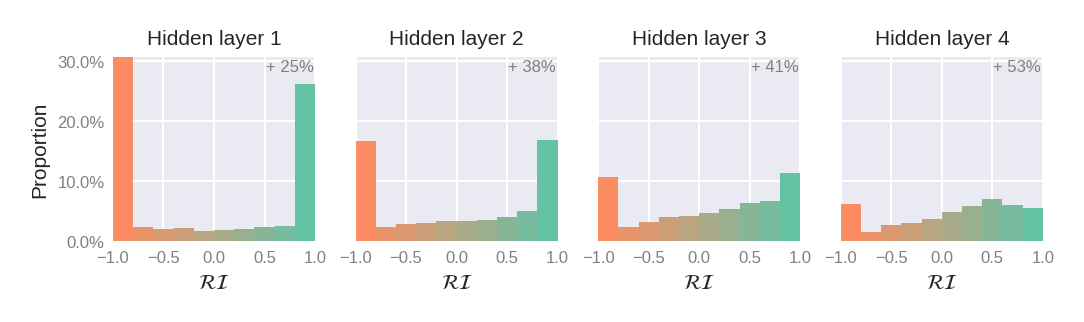

Gradient of r2 =  0.5


Model: 100%|██████████| 20/20 [00:50<00:00,  2.54s/it]


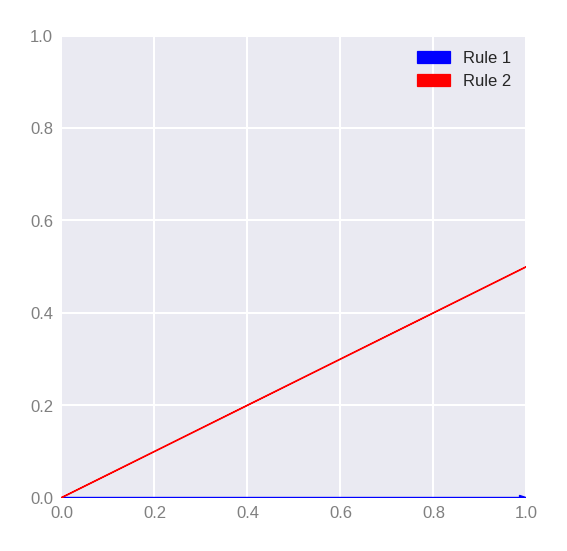

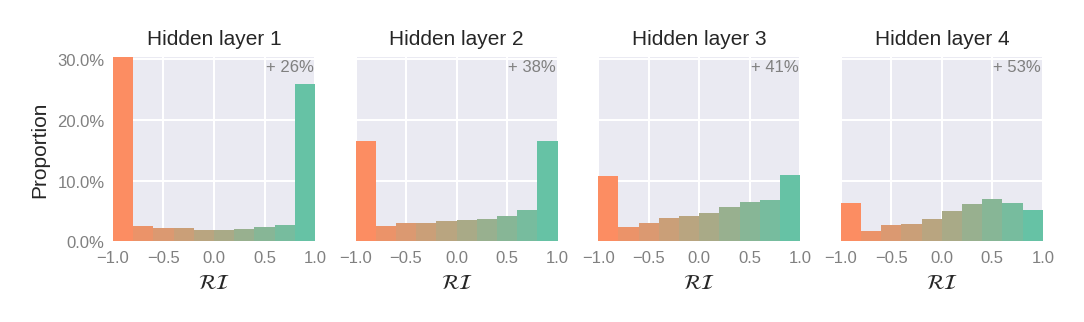

Gradient of r2 =  0.4


Model: 100%|██████████| 20/20 [00:50<00:00,  2.50s/it]


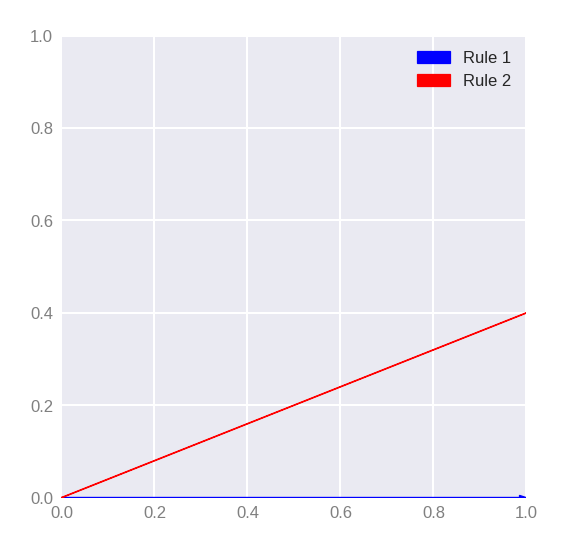

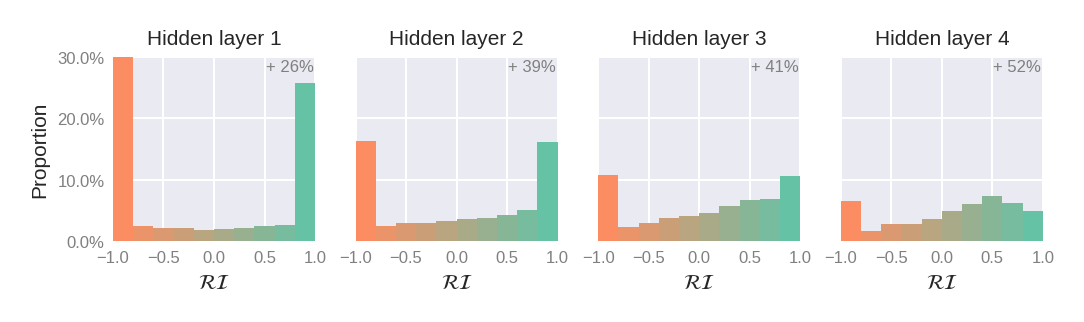

Gradient of r2 =  0.30000000000000004


Model: 100%|██████████| 20/20 [00:54<00:00,  2.70s/it]


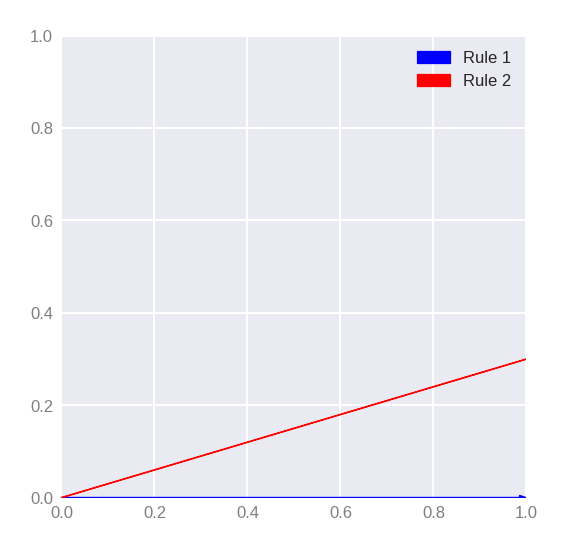

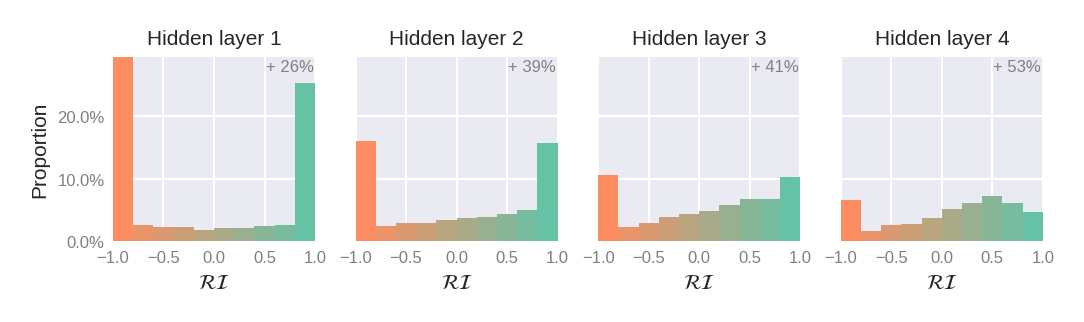

Gradient of r2 =  0.2


Model: 100%|██████████| 20/20 [00:48<00:00,  2.41s/it]


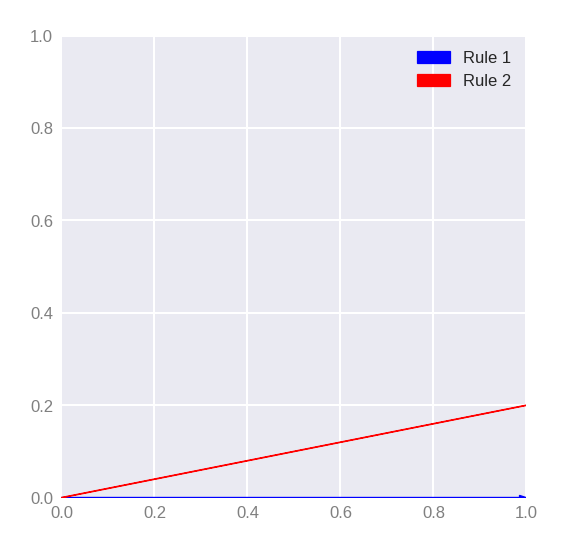

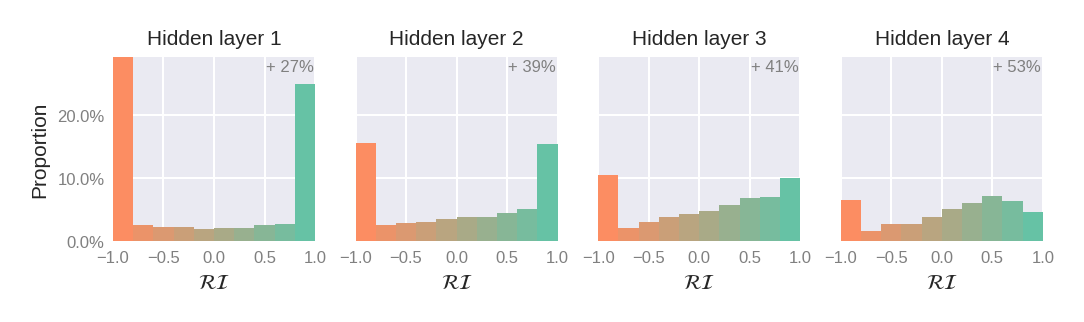

Gradient of r2 =  0.001


Model: 100%|██████████| 20/20 [00:45<00:00,  2.29s/it]


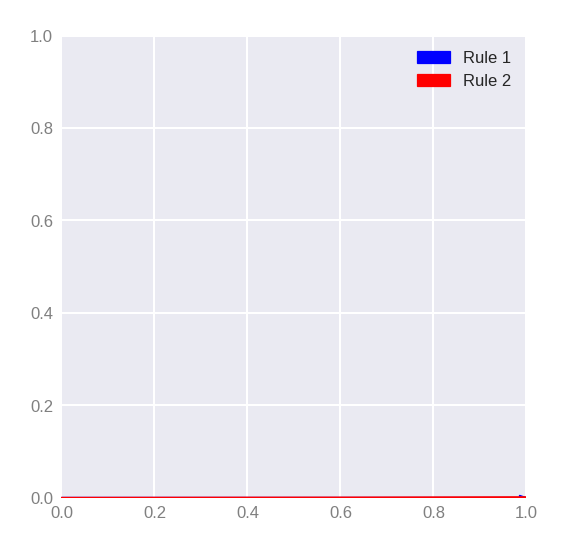

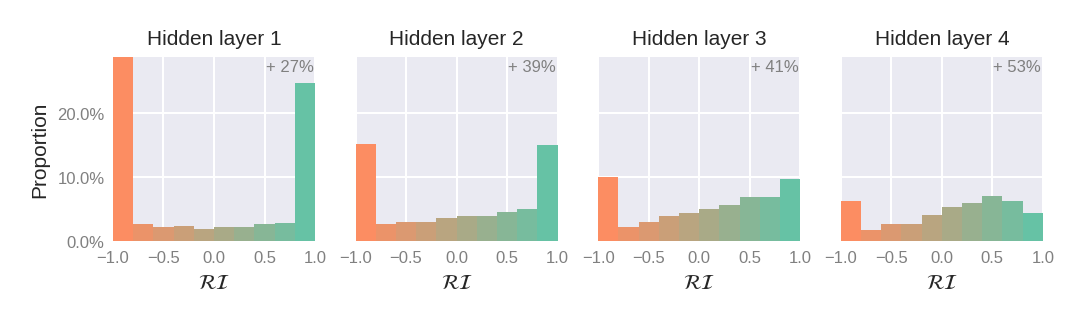

[simple_network(
   (fc1): Linear(in_features=4, out_features=50, bias=True)
   (fc2): Linear(in_features=50, out_features=50, bias=True)
   (fc3): Linear(in_features=50, out_features=50, bias=True)
   (fc4): Linear(in_features=50, out_features=50, bias=True)
   (fc5): Linear(in_features=50, out_features=1, bias=True)
 ),
 simple_network(
   (fc1): Linear(in_features=4, out_features=50, bias=True)
   (fc2): Linear(in_features=50, out_features=50, bias=True)
   (fc3): Linear(in_features=50, out_features=50, bias=True)
   (fc4): Linear(in_features=50, out_features=50, bias=True)
   (fc5): Linear(in_features=50, out_features=1, bias=True)
 ),
 simple_network(
   (fc1): Linear(in_features=4, out_features=50, bias=True)
   (fc2): Linear(in_features=50, out_features=50, bias=True)
   (fc3): Linear(in_features=50, out_features=50, bias=True)
   (fc4): Linear(in_features=50, out_features=50, bias=True)
   (fc5): Linear(in_features=50, out_features=1, bias=True)
 ),
 simple_network(
   (fc1): L

In [2]:
theta_variation(model_class='simple_network')

Model: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


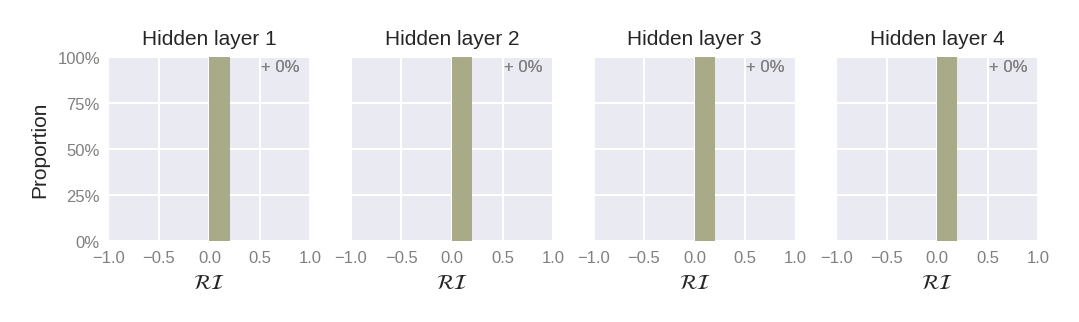

In [2]:
N_models = 1
models1 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_I(models1)